In [1]:
import pandas as pd
import numpy as np

In [2]:

import matplotlib.pyplot as plt

In [3]:
# df1 = pd.read_csv('online_retail_II.csv')

In [4]:
# df1.shape

(525461, 8)

In [5]:
# df2 = pd.read_csv('online_retail_II_1.csv')

In [6]:
# df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

In [7]:
# df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
# df2.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/PravinSabariBala/Business-Analysis-on-UCI-sales-dataset/main/Final_dataset.csv')

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [12]:
if 'Customer ID' in df.columns:
    df.rename(columns={'Customer ID':'Customer_ID'},inplace=True) 

In [13]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer_ID    243007
Country             0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer_ID    0
Country        0
dtype: int64

## feature engineering:
creating amount column from quantity and price

In [16]:
df['Amount'] = df['Quantity'] * df['Price']

In [17]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0


 negative quantity value in a sales dataset would typically indicate that a product or item has been returned or cancelled.

## creating new dataframe 
the new dataframe has total amount customer have spent
and the other new dataset has the frequency of each customer

In [18]:
each_customer_total_purchase = df.groupby('Customer_ID')['Amount'].sum()

In [19]:
each_customer_total_purchase.head()

Customer_ID
12346.0     -64.68
12347.0    5633.32
12348.0    2019.40
12349.0    4404.54
12350.0     334.40
Name: Amount, dtype: float64

In [20]:
each_customer_freq = df.groupby('Customer_ID')['Invoice'].count()

In [21]:
each_customer_freq.head()

Customer_ID
12346.0     48
12347.0    253
12348.0     51
12349.0    180
12350.0     17
Name: Invoice, dtype: int64

In [22]:
customer_details = pd.merge(each_customer_freq,each_customer_total_purchase,on='Customer_ID')

In [23]:
customer_details.reset_index(inplace=True)

In [24]:
customer_details.head()

,Customer_ID,Invoice,Amount
0,12346.0,48,-64.68
1,12347.0,253,5633.32
2,12348.0,51,2019.40
3,12349.0,180,4404.54
4,12350.0,17,334.40


## another attribute can be Recency
Recency in sales refers to the concept of how recently a customer has made a purchase 

In [25]:
maxdate = np.max(df['InvoiceDate'])

In [26]:
df['recency'] = maxdate-df['InvoiceDate']

In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount,recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,1062 days 09:34:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,1062 days 09:34:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,1062 days 09:34:00


In [28]:
# customer_details['recency'] = 
recency_df = df.groupby('Customer_ID')['recency'].min()

In [29]:
recency_df=recency_df.reset_index()

In [30]:
recency_df.head()

,Customer_ID,recency
0,12346.0,326 days 07:02:00
1,12347.0,40 days 04:54:00
2,12348.0,76 days 04:06:00
3,12349.0,19 days 07:28:00
4,12350.0,311 days 01:18:00


In [31]:
customer_details['recency'] = recency_df['recency'].dt.days

In [32]:
customer_details.head()

,Customer_ID,Invoice,Amount,recency
0,12346.0,48,-64.68,326
1,12347.0,253,5633.32,40
2,12348.0,51,2019.40,76
3,12349.0,180,4404.54,19
4,12350.0,17,334.40,311


## Removing outliers in amount

In [33]:
customer_details.isna().sum()

Customer_ID    0
Invoice        0
Amount         0
recency        0
dtype: int64

In [34]:
customer_details.head()

,Customer_ID,Invoice,Amount,recency
0,12346.0,48,-64.68,326
1,12347.0,253,5633.32,40
2,12348.0,51,2019.40,76
3,12349.0,180,4404.54,19
4,12350.0,17,334.40,311


In [35]:
print("The min amount is",customer_details['Amount'].min())
print("The max amount is",customer_details['Amount'].max())


The min amount is -25111.09
The max amount is 598215.22


In [36]:
z = np.quantile(customer_details['Amount'],0.25)

In [37]:
y = np.quantile(customer_details['Amount'],0.75)

In [38]:
iqr =y-z
iqr

1856.9075

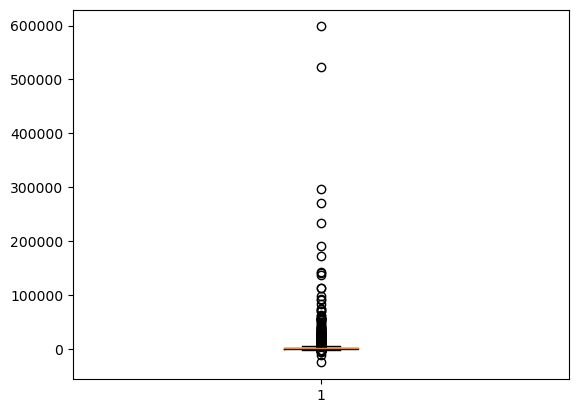

In [39]:
plt.boxplot(customer_details['Amount'])
plt.show()

In [40]:
customer_details = customer_details[(customer_details['Amount']>=z-1.5*iqr) & (customer_details['Amount']<=y+1.5*iqr)]

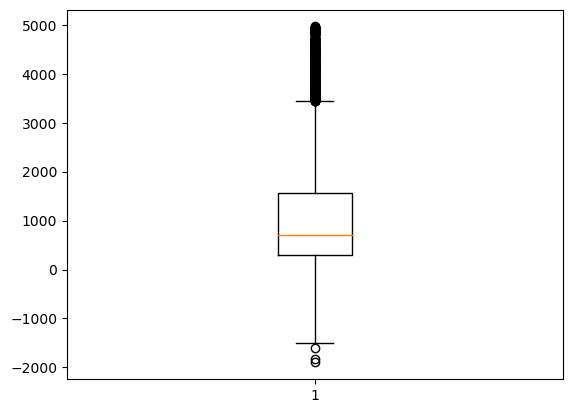

In [41]:
plt.boxplot(customer_details['Amount'])
plt.show()

We removed outliers, we didnt use q1 q3 to find iqr here to avoid loss of data

### Scaling data using standard scale

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
scaled_customer = sc.fit_transform(customer_details[customer_details.columns[1:]])

In [45]:
scaled_customer.shape

(5289, 3)

In [46]:
scaled_customer_data = pd.DataFrame(scaled_customer,columns = ['Invoice', 'Amount', 'recency'])

In [47]:
scaled_customer_data.head()

,Invoice,Amount,recency
0,-0.327996,-1.040898,0.447909
1,-0.299377,0.806301,-0.696119
2,0.931270,2.920340,-0.956957
3,-0.623733,-0.687178,0.379267
4,-0.585574,-0.716844,0.676714


In [48]:
from sklearn.cluster import KMeans

finding optimal k value

In [49]:
scores = [] 
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(scaled_customer_data)
    scores.append(kmeans.inertia_)

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

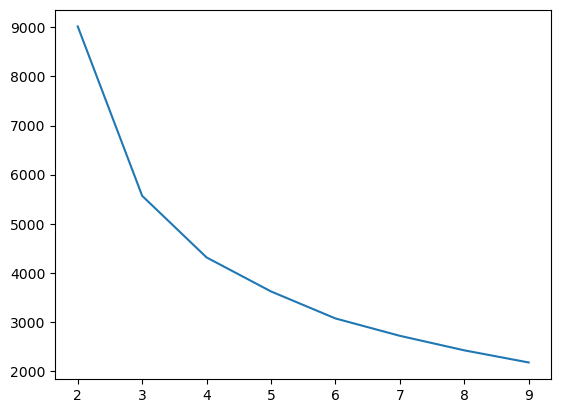

In [50]:
plt.plot(range(2,10,1),scores)
plt.xticks(ticks=range(2,10))
plt.show()

In [51]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(scaled_customer_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_customer_data,cluster_labels)
    print("For ",i," cluster the silhaoutte score is ",silhouette_avg)

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  2  cluster the silhaoutte score is  0.47257260698179876


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  3  cluster the silhaoutte score is  0.4424924742792391


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  4  cluster the silhaoutte score is  0.44219038614465594


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  5  cluster the silhaoutte score is  0.4039069458085451


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  6  cluster the silhaoutte score is  0.37204298580387896


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  7  cluster the silhaoutte score is  0.37712701438771806


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  8  cluster the silhaoutte score is  0.38238387363086074


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For  9  cluster the silhaoutte score is  0.3556543367157518


k = 3 has more silhouette score

In [52]:
final_model = KMeans(n_clusters=3,max_iter=40).fit(scaled_customer_data)
clusters = final_model.labels_

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
customer_details['Cluster'] = clusters

In [54]:
customer_details.head()

,Customer_ID,Invoice,Amount,recency,Cluster
0,12346.0,48,-64.68,326,1
2,12348.0,51,2019.40,76,0
3,12349.0,180,4404.54,19,2
4,12350.0,17,334.40,311,1
5,12351.0,21,300.93,376,1


In [55]:
customer_details.groupby('Cluster')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2546.0,836.834358,593.190217,-451.42,351.505,712.790,1192.085,3166.40
1,1784.0,465.017832,509.922164,-1899.67,159.275,319.385,614.160,3710.50
2,959.0,3033.405717,965.697848,862.20,2328.360,2980.080,3779.180,4966.92


In [56]:
customer_details.groupby('Cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2546.0,97.139827,82.747402,0.0,26.0,70.0,159.0,361.0
1,1784.0,493.275785,140.128265,267.0,388.0,458.5,584.5,1062.0
2,959.0,82.592284,105.758280,0.0,16.5,39.0,104.0,592.0


In [57]:
customer_details.groupby('Cluster')['Invoice'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2546.0,55.840927,45.287020,1.0,21.0,44.0,80.0,259.0
1,1784.0,33.667601,35.927295,1.0,10.0,22.0,45.0,254.0
2,959.0,243.464025,143.338689,1.0,151.0,209.0,295.0,1000.0


In [58]:
import seaborn as sns

In [59]:
customer_details.columns

Index(['Customer_ID', 'Invoice', 'Amount', 'recency', 'Cluster'], dtype='object')

## Visualizing Clusters

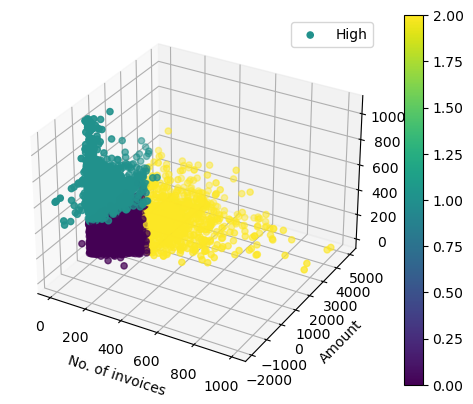

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fg=ax.scatter3D(customer_details['Invoice'], customer_details['Amount'], customer_details['recency'],c=customer_details['Cluster'])
# plt.legend()
ax.set_xlabel('No. of invoices')
ax.set_ylabel('Amount')
ax.set_zlabel('recency period')
plt.colorbar(fg)
plt.legend(['High','Low','Medium'])

## visualising using plotly

In [61]:
import plotly.graph_objs as go

In [62]:
import numpy as np
import plotly.graph_objs as go

# creating trace
trace = go.Scatter3d(
    x=customer_details['Invoice'],
    y=customer_details['Amount'],
    z=customer_details['recency'],
    mode='markers',
    marker=dict(
        size=5,
        color=customer_details['Cluster'],
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Cluster')
    )
)

# Create a layout for the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='No. of Invoices'),
        yaxis=dict(title='Amount'),
        zaxis=dict(title='Recency')
    ),
    legend=dict(title='Cluster', title_font=dict(size=15))
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [63]:
# df.to_csv("Final_dataset.csv",index=False)

## Clustering with pca

from sklearn.decomposition import PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
df_pca = PCA(2).fit_transform(customer_details)

In [66]:
df_pca.shape

(5289, 2)

In [67]:
customer_details.shape

(5289, 5)

In [68]:
scores_pca = [] 
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(df_pca)
    scores_pca.append(kmeans.inertia_)

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\

In [69]:
scores_pca

[10670063878.937735,
 7258042649.908109,
 5377235196.043088,
 3915549563.35303,
 3336677803.8365726,
 2944663048.4037366,
 2567332227.853932,
 2277670534.5166597]

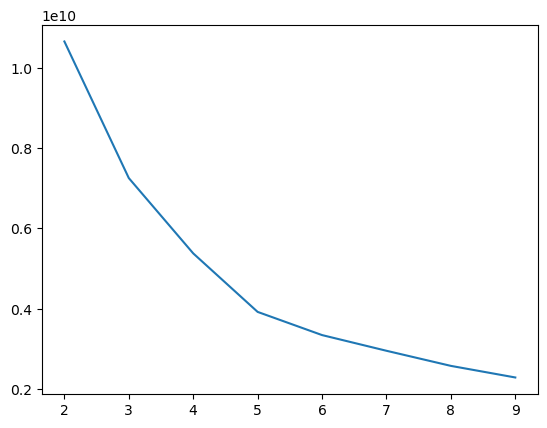

In [70]:
plt.plot(range(2,10,1),scores_pca)
plt.xticks(ticks=range(2,10))
plt.show()

In [71]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(df_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca,cluster_labels)
    print("For ",i," cluster the silhaoutte score is ",silhouette_avg)

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  2  cluster the silhaoutte score is  0.4610264316078736


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  3  cluster the silhaoutte score is  0.4791560964602684


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  4  cluster the silhaoutte score is  0.4151298132413492


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  5  cluster the silhaoutte score is  0.4394436732640637


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  6  cluster the silhaoutte score is  0.38730034040543


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  7  cluster the silhaoutte score is  0.38940092970607887


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  8  cluster the silhaoutte score is  0.3953007357875825


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For  9  cluster the silhaoutte score is  0.3885157264833105


In [72]:
final_pcamodel = KMeans(n_clusters=3,max_iter=40).fit(df_pca)
clusters = final_pcamodel.labels_


c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [73]:
dfinal_pca = pd.DataFrame(df_pca,columns=["PC_1","PC_2"])
dfinal_pca.head()

,PC_1,PC_2
0,2932.289806,-1330.700406
1,3038.523452,760.100097
2,3160.165930,3142.303497
3,2948.929645,-934.799897
4,2945.917243,-972.994482


In [74]:
dfinal_pca['Category'] = np.array(clusters)

In [75]:
dfinal_pca.head()

,PC_1,PC_2,Category
0,2932.289806,-1330.700406,0
1,3038.523452,760.100097,0
2,3160.165930,3142.303497,2
3,2948.929645,-934.799897,0
4,2945.917243,-972.994482,0


In [76]:
categories = np.unique(clusters)

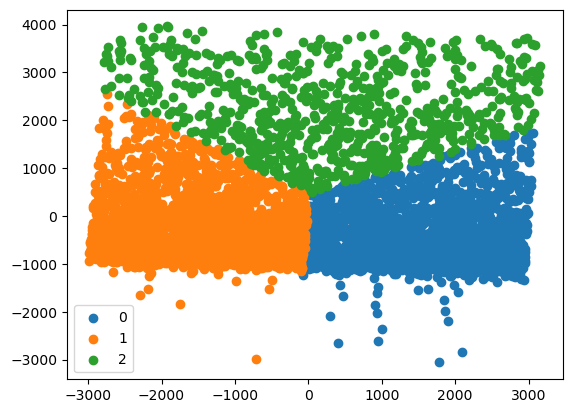

In [77]:
for i in categories:
    plt.scatter(dfinal_pca[dfinal_pca['Category']==i]['PC_1'], dfinal_pca[dfinal_pca['Category']==i]['PC_2'], label=i)
plt.legend()
plt.show()


In [78]:
df.head(
    
)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,Amount,recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,83.4,1062 days 09:34:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,81.0,1062 days 09:34:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,100.8,1062 days 09:34:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,30.0,1062 days 09:34:00


In [79]:
dfinal_pca.head()

,PC_1,PC_2,Category
0,2932.289806,-1330.700406,0
1,3038.523452,760.100097,0
2,3160.165930,3142.303497,2
3,2948.929645,-934.799897,0
4,2945.917243,-972.994482,0


## Analizing each category clustered from pca technique

In [80]:
customer_details_pca = customer_details

In [81]:
customer_details_pca['Cluster'] = dfinal_pca['Category']

In [82]:
customer_details_pca.groupby('Cluster')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,1963.0,1146.261815,1149.881795,-1834.14,309.4100,739.20,1629.7450,4966.92
1.0,2068.0,1104.763934,1105.519402,-779.32,305.6000,708.89,1530.5250,4958.34
2.0,672.0,1125.420301,1157.073715,-1899.67,275.7975,710.84,1643.0575,4817.28


In [83]:
customer_details_pca.groupby('Cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,1963.0,224.288334,215.423485,0.0,37.0,146.0,392.50,1062.0
1.0,2068.0,229.953578,221.968296,0.0,43.0,145.5,395.00,1062.0
2.0,672.0,225.811012,218.245070,0.0,35.0,151.5,389.25,1062.0


In [84]:
customer_details_pca.groupby('Cluster')['Invoice'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,1963.0,76.275089,92.295214,1.0,18.0,44.0,96.0,977.0
1.0,2068.0,89.673114,115.550777,1.0,19.0,46.0,115.0,994.0
2.0,672.0,80.290179,97.226811,1.0,16.0,46.0,108.0,634.0


## PCA classification is not good as all the clusters are having alomst uniform values

## Using SVD

In [85]:
from sklearn.decomposition import TruncatedSVD

In [86]:
svd = TruncatedSVD(n_components=2, random_state=42)

In [87]:
df_svd = svd.fit_transform(customer_details.drop(columns=['Cluster']))

In [88]:
kmeans_svd = KMeans(n_clusters=3, random_state=42)

In [89]:
kmeans_svd.fit(df_svd)

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [90]:
print("Cluster labels: ", kmeans_svd.labels_)
print("Cluster centroids: ", kmeans_svd.cluster_centers_)

Cluster labels:  [1 1 2 ... 0 0 2]
Cluster centroids:  [[16896.19827282  -464.84186387]
 [13856.93095408  -262.08020157]
 [15323.86878634  2238.41506289]]


In [91]:
customer_details_svd = customer_details

In [92]:
customer_details_svd['Cluster'] = kmeans_svd.labels_

In [93]:
customer_details_svd.groupby('Cluster')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2294.0,739.930372,652.016401,-1899.67,242.0450,534.11,1064.9525,3507.39
1,2226.0,729.556224,619.484432,-1834.14,255.4475,563.54,1085.7875,2989.22
2,769.0,3313.154412,834.484008,1596.81,2664.8100,3273.36,3970.7700,4966.92


In [94]:
customer_details_svd.groupby('Cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2294.0,251.940279,224.794754,0.0,51.0,185.0,415.0,1062.0
1,2226.0,251.842318,220.573281,0.0,51.0,185.0,416.0,1062.0
2,769.0,88.395319,119.015054,0.0,16.0,39.0,109.0,639.0


In [95]:
customer_details_svd.groupby('Cluster')['Invoice'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2294.0,66.039669,82.173037,1.0,17.0,38.0,83.75,986.0
1,2226.0,52.367475,58.366550,1.0,15.0,34.0,69.00,519.0
2,769.0,218.011704,154.311141,1.0,121.0,180.0,266.00,1000.0


according to svd cluster 2 is the best customers followed by 0 and 1

In [96]:
dfinal_svd = pd.DataFrame(df_svd,columns=["PC_1","PC_2"])
dfinal_svd.head()

,PC_1,PC_2
0,12313.510853,-952.410670
1,12460.416884,1135.652049
2,12631.288181,3515.452525
3,12345.561930,-557.327392
4,12345.147273,-595.412402


In [97]:
dfinal_svd['Category'] = kmeans_svd.labels_

In [98]:
dfinal_svd.head()

,PC_1,PC_2,Category
0,12313.510853,-952.410670,1
1,12460.416884,1135.652049,1
2,12631.288181,3515.452525,2
3,12345.561930,-557.327392,1
4,12345.147273,-595.412402,1


In [99]:
categories = np.unique(clusters)

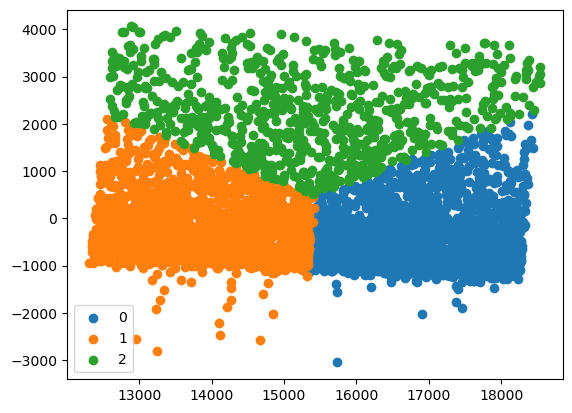

In [100]:
for i in categories:
    plt.scatter(dfinal_svd[dfinal_svd['Category']==i]['PC_1'], dfinal_svd[dfinal_svd['Category']==i]['PC_2'], label=i)
plt.legend()
plt.show()
